In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

*The dataset1 applesOranges.csv contains 200 measurements (x.1 and x.2) from two types of objects as indicated by the column y. In this exercise, you will use a connectionist neuron with a “binary” transfer function f(h) to classify the objects, i.e., obtain the predicted class y for a datapoint _x_∈R2 by*

*a) Plot the data in a scatter plot (x2 vs x1). Mark the points with different colors to indicate the type of each object*

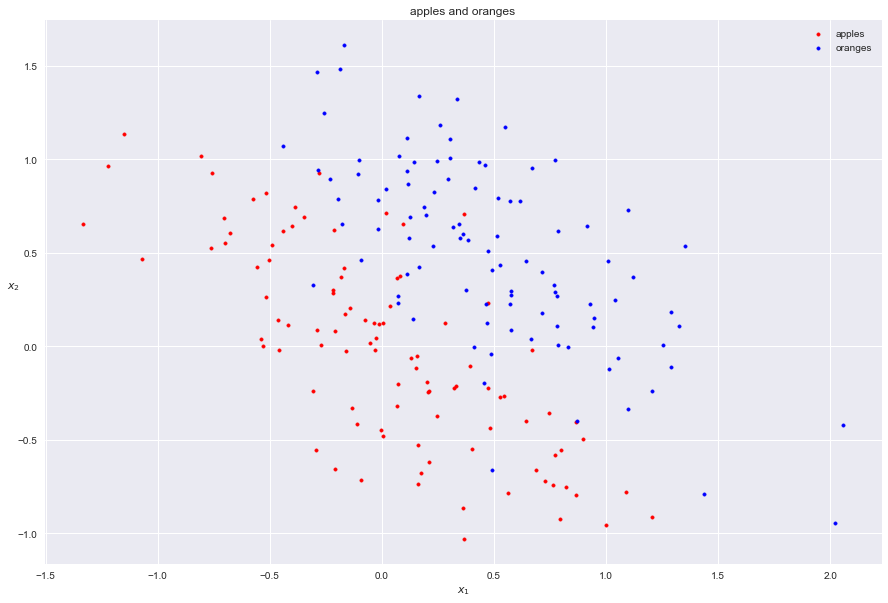

In [103]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',',dtype=float, skip_header=1)

#Produce a 2D scatter plot for x. Use different markers to distinguish “apple” points from “orange” points. Add a legend to your plot.

f1 = plt.figure(figsize=(15,10))
plt.style.use('seaborn')

x = expdat[:,:2]
y = expdat[:,-1]

plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='b', label='oranges')

lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()

*Set the bias θ = 0. Create a set of 19 weight vectors w = (w1,w2)⊤ pointing from the origin to the upper semi-circle with radius 1 (i.e. if γ denotes the angle between the weight vector and the x-axis, for each γ = 0, 10, . . . , 180 (equally spaced) such that ||w||2 = 1, w1 ∈ [−1, 1], w2 ∈ [0, 1]).*

[0.675, 0.705, 0.76, 0.745, 0.71, 0.735, 0.755, 0.75, 0.725, 0.69, 0.63, 0.6, 0.565, 0.52, 0.505, 0.465, 0.42, 0.35, 0.325]


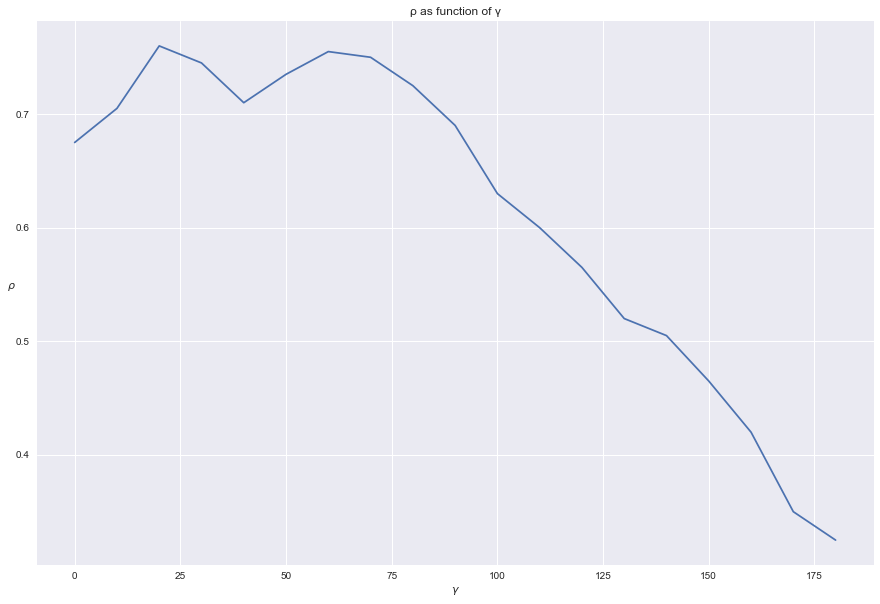

In [174]:
def classify(h):
    t = np.copy(h)
    
    positive =[]
    negative = []
    
    positive = h >=0
    negative = h < 0
    
    t[positive] = 1
    t[negative] = 0
    
    
    return t

#Initialize bias, weights and learning rate

bias = 0

winkel = np.linspace(0,np.pi,19)
radius=1
w1 = radius*np.cos(winkel)
w2 = radius*np.sin(winkel)
w = np.array([w1,w2])

# print(f'x={x.shape}')
# print(f'w={w.shape}')

#Neuron Input

h = np.matmul(w.T,x.T)-bias

#create a new array that contains the classification of each data point.

classification= classify(h)

#(i) determine % correct classifications ρ of the corresponding neuron for each weight vector w

genauikeit=[]

for i in range(h.shape[0]):
    tn, tp, fp, fn = 0,0,0,0
    for j in range(h.shape[1]):
        
        #Number of misclassifications (true negatives/Apples/00)
        if classification[i,j] == 0 and y[j] == 0:
            tn+=1
        #Number of correct classifications (true positives/Oranges/11)
        elif classification[i,j] == 1 and y[j] == 1:
            tp+=1
        #number of apples that are classified as oranges (false positives/01)
        elif classification[i,j] == 0 and y[j] == 1:
            fp+=1
        #number of oranges that are classified as apples (false negatives/10)
        elif classification[i,j] == 1 and y[j] == 0:
            fn+=1
    
    prozent = (tp+tn)/(tp+tn+fp+fn)
    genauikeit.append(prozent)
print(genauikeit)
        
# (ii) plot a curve showing ρ as a function of γ

f1 = plt.figure(figsize=(15,10))

plt.plot((winkel*180)/math.pi,genauikeit)

plt.xlabel('$γ$')
plt.ylabel('$ρ$', rotation='horizontal')
plt.title("ρ as function of γ")
plt.show()


*Out of the 19 weight vectors from above, pick the w that yields the best performance. Now,
vary the bias θ ∈ [−3, 3] and pick the value of θ that gives the best performance.*

In [195]:
best_weight = w[:,np.argmax(genauikeit),np.newaxis]
# print(f'best weight vector: {best.shape}')


#Initialize bias, weights and learning rate

bias = np.linspace(-3,3,500)

#Neuron Input

h0 = np.matmul(best_weight.T,x.T)

genauikeit_bias = []

for k in range(len(bias)):
    h = h0 - bias[k]
    classification= classify(h)
    tn, tp, fp, fn = 0,0,0,0
    for j in range(h.shape[1]):
        
        #Number of misclassifications (true negatives/Apples/00)
        if classification[0,j] == 0 and y[j] == 0:
            tn+=1
        #Number of correct classifications (true positives/Oranges/11)
        elif classification[0,j] == 1 and y[j] == 1:
            tp+=1
        #number of apples that are classified as oranges (false positives/01)
        elif classification[0,j] == 0 and y[j] == 1:
            fp+=1
        #number of oranges that are classified as apples (false negatives/10)
        elif classification[0,j] == 1 and y[j] == 0:
            fn+=1
    
    prozent = (tp+tn)/(tp+tn+fp+fn)
    genauikeit_bias.append(prozent)
    
best_bias = bias[np.argmax(genauikeit_bias)]
print(f'Best bias: {best_bias} with accuracy of {np.max(genauikeit_bias)*100}%')


Best bias: 0.13827655310621223 with accuracy of 80.5%


*Plot the data points and color them according to the predicted classification when using the w and θ that led to the highest performance. Plot the weight vector w in the same plot. How do you interpret your results?*

In [199]:
h_classificated = classify(h0 - best_bias)

x = expdat[:,:2]
y = h_classificated

plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='b', label='oranges')


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed